In [2]:
import os
import numpy as np
import pandas as pd
from tabulate import tabulate
from matplotlib import pyplot as plt
import seaborn as sn
import random
from skimage.io import imread, imsave
from skimage.feature import greycomatrix, greycoprops
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

dir_imagenes="images/"
dir_labels="annotations/trimaps"
%matplotlib inline

## Ejemplos de imágenes

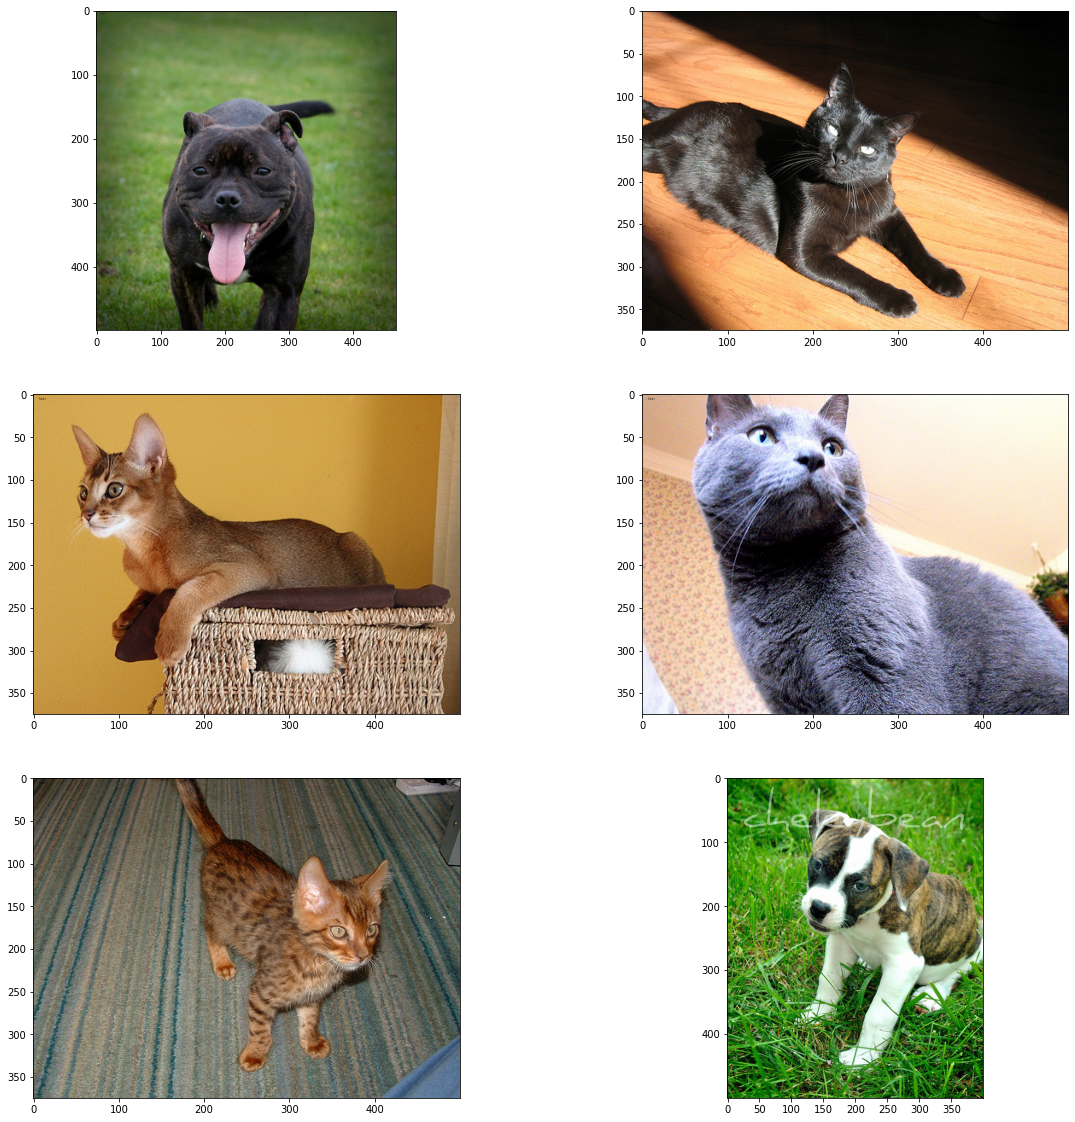

In [3]:
archivos= os.listdir(dir_imagenes)


fig, axs = plt.subplots(3,2,figsize=(20,20))
k=0
for j in range(3):
    for i in range(2):
        J1 = cv2.imread(dir_imagenes+archivos[k])
        J1=cv2.cvtColor(J1, cv2.COLOR_BGR2RGB)

        axs[j,i].imshow(J1)
        k=k+1

  


None


TypeError: Image data of dtype object cannot be converted to float

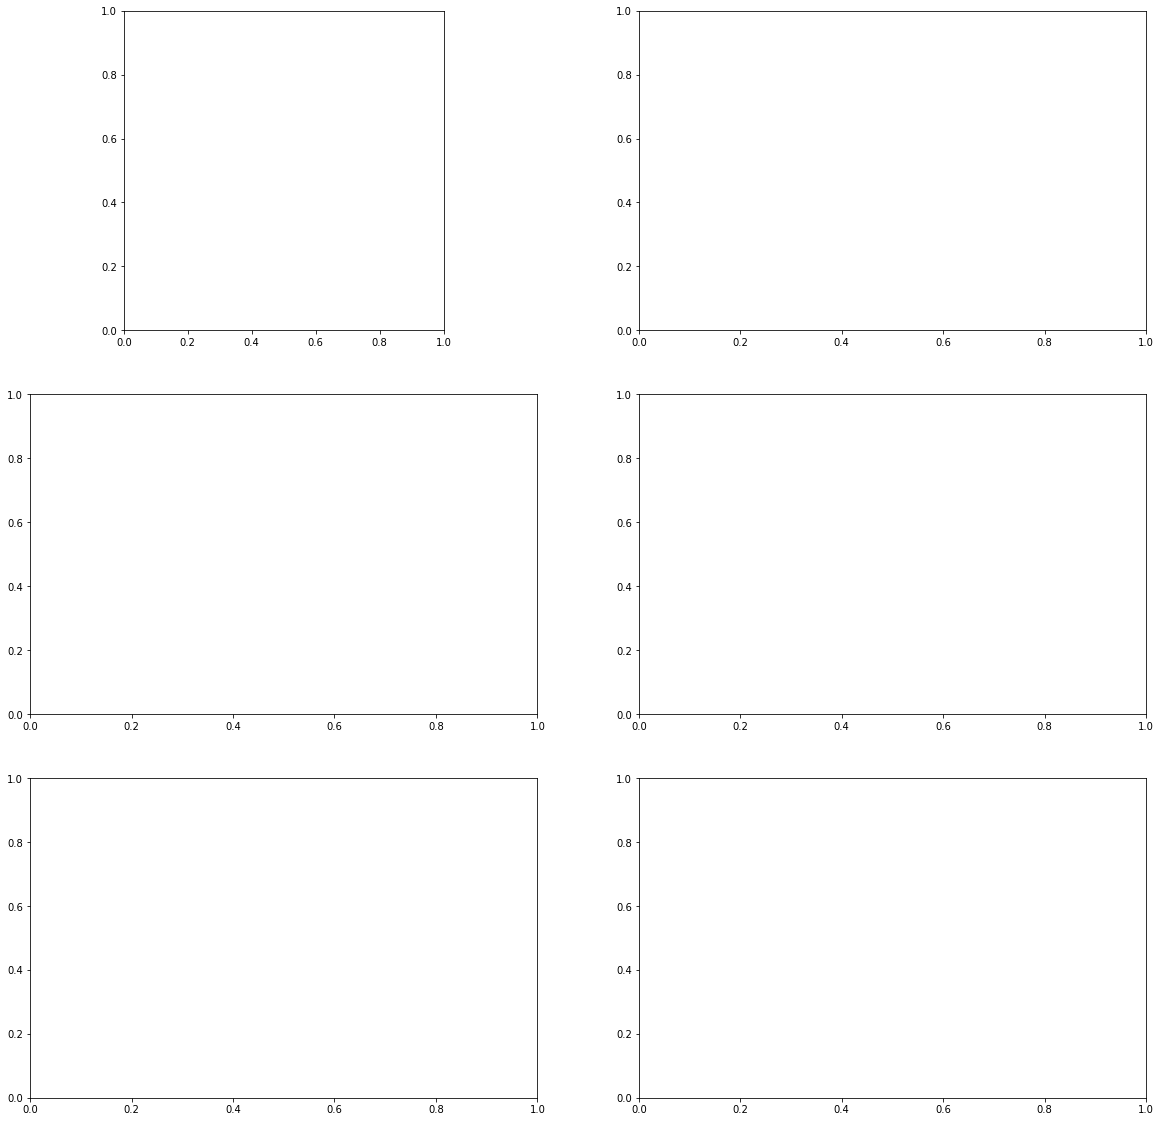

In [10]:
archivos= os.listdir(dir_labels)


fig, axs = plt.subplots(3,2,figsize=(20,20))
k=0
for j in range(3):
    for i in range(2):
        #J1 = cv2.imread(dir_labels+archivos[k])
        J1=cv2.imread("/home/sere/Descargas/annotations/trimaps/._Abyssinian_1.png")
       # J1=cv2.cvtColor(J1, cv2.COLOR_BGR2RGB)
        print(J1)
        axs[j,i].imshow(J1)
        k=k+1


## Segmentación

<Figure size 432x288 with 0 Axes>

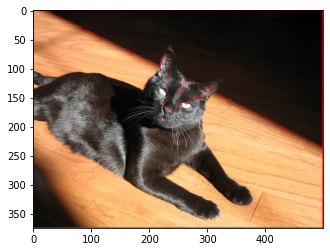

<Figure size 432x288 with 0 Axes>

In [50]:
J1 = cv2.imread(dir_imagenes+archivos[1])
J1=cv2.cvtColor(J1, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(J1,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers = cv2.watershed(J1,markers)
J1[markers == -1] = [255,0,0]
plt.imshow(J1)
plt.figure()


<Figure size 432x288 with 0 Axes>

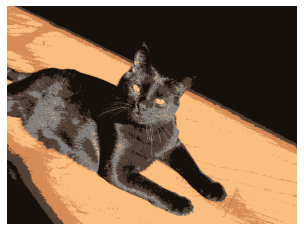

<Figure size 432x288 with 0 Axes>

In [51]:
J1 = cv2.imread(dir_imagenes+archivos[1])
J1=cv2.cvtColor(J1, cv2.COLOR_BGR2RGB)
twoDimage = J1.reshape((-1,3))
twoDimage = np.float32(twoDimage)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
attempts=15
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((J1.shape))
plt.figure()
plt.axis('off')
plt.imshow(result_image)
plt.figure()


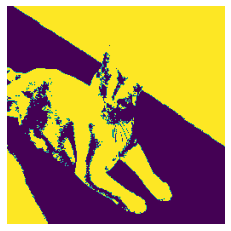

In [52]:
sample_image = cv2.imread(dir_imagenes+archivos[1])
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(256,256))

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

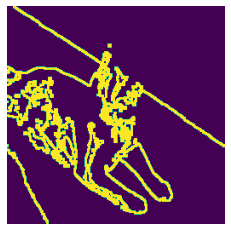

In [53]:
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

plt.axis('off')
plt.imshow(edges)

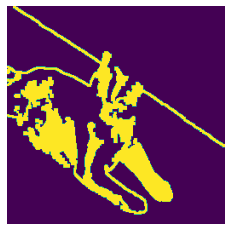

In [54]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

plt.axis('off')
plt.imshow(masked)

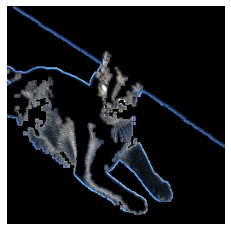

In [55]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(segmented)

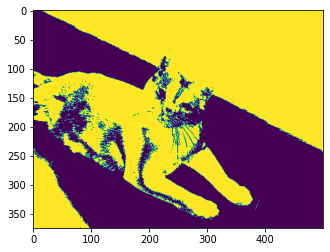

In [58]:
from skimage.filters import threshold_otsu
J1 = cv2.imread(dir_imagenes+archivos[1])        
J1=cv2.cvtColor(J1, cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(J1,cv2.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

plt.imshow(img_otsu)

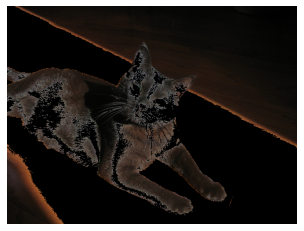

In [60]:
def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(J1, img_otsu)

plt.axis('off')
plt.imshow(filtered)



## Texturas

## Color

https://medium.com/lifeandtech/color-segmentation-using-gmm-7a8d900e48b

## Algoritmo

https://towardsdatascience.com/dog-breed-classification-using-deep-learning-concepts-23213d67936c

## Prediccion

Prediccion en chiste: pasarle una persona y ver que raza serías :)